In [1]:
from stardist import random_label_cmap

from functions import *

In [2]:
model_path = r'C:\Users\Donald\Downloads\temp\Fallopian_monkey_test_tiles_2_20_24_lr_0.001_epochs_50_pt_40'

model = load_model(model_path)

base_model.py (149): output path for model already exists, files may be overwritten: C:\Users\Donald\Downloads\temp\Fallopian_monkey_test_tiles_2_20_24_lr_0.001_epochs_50_pt_40\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6973196816311521, nms=0.3) 


In [3]:
testing_tiles_path = r'\\10.99.68.178\andreex\data\Stardist\Testing\monkey\tiles'
testing_masks_path = r'\\10.99.68.178\andreex\data\Stardist\Testing\monkey\qupath\ground_truth\masks'

testing_tiles = normalize_images(read_tiles(testing_tiles_path))
testing_masks = read_masks(testing_masks_path)

In [4]:
predictions = segment_tiles(testing_tiles, model)

100%|██████████| 36/36 [00:03<00:00, 10.96it/s]


In [5]:
#Random color map labels
np.random.seed(42)
lbl_cmap = random_label_cmap()

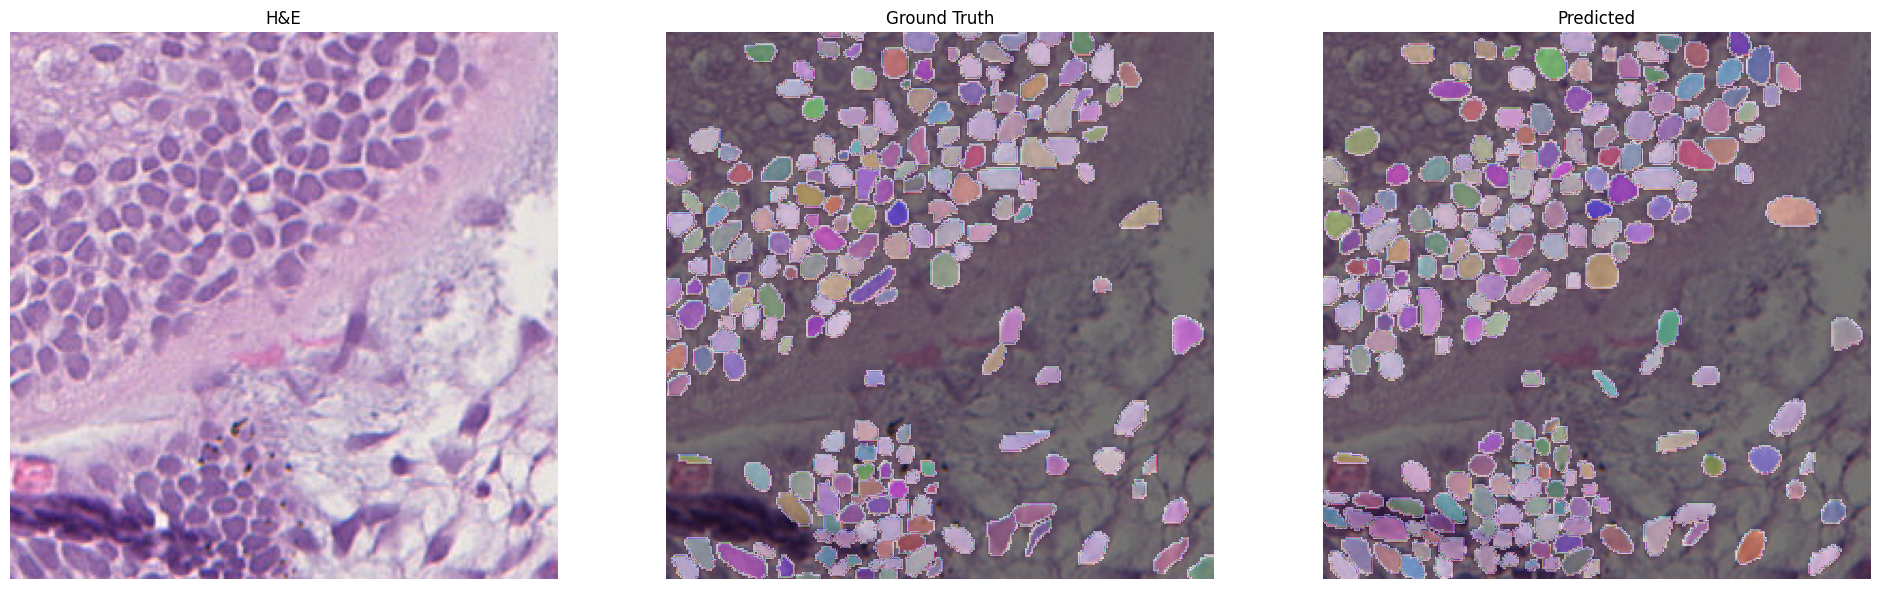

In [6]:
i = 0

tile = testing_tiles[i]
gt_mask = testing_masks[i]
pred_mask = predictions[i]

plot_predictions_vs_gt(tile, gt_mask, pred_mask, lbl_cmap)

In [7]:
taus = [0.7]

results = get_stats(testing_tiles_path, testing_masks, predictions, taus)

functions.py (306): The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
functions.py (306): The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


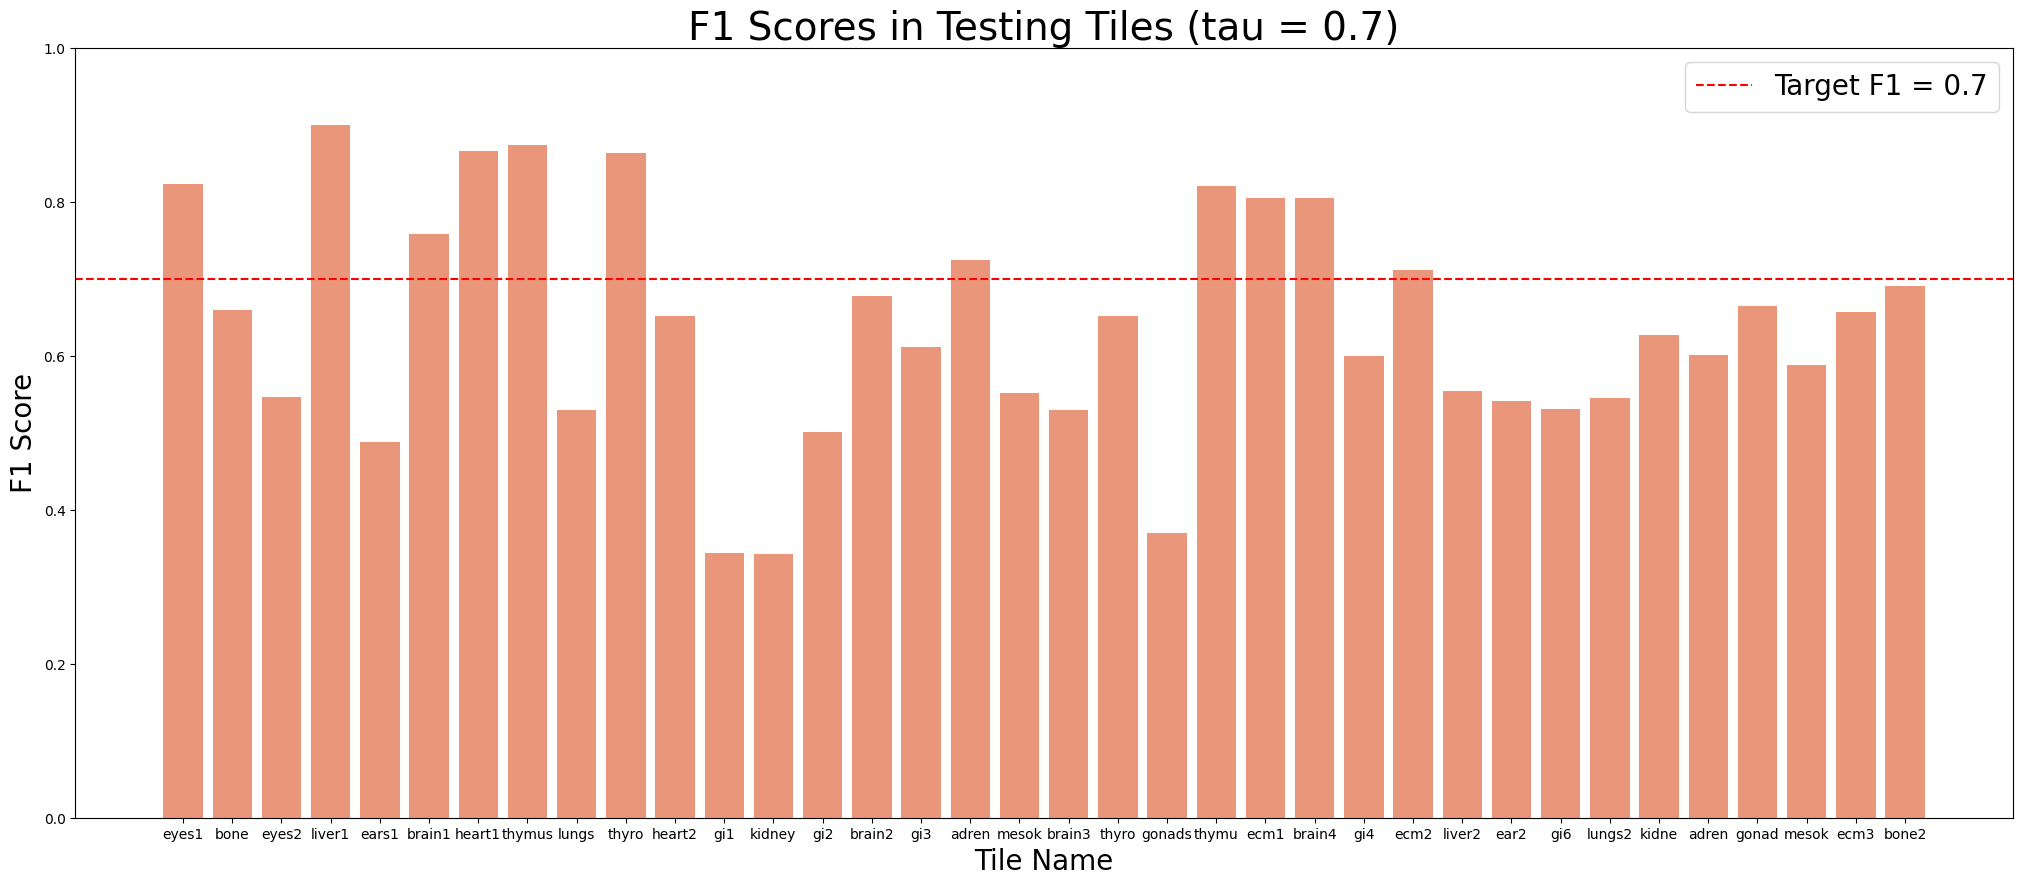

In [8]:
# right now, this function assumes first value in tau is the only tau
# you will probably need to go in and change the function to switch up the names since I am assuming all names start with "monkey_fetus_gestational_40" to get name of im
make_f1_plot(testing_tiles_path, results, taus)